In [1]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,compare_historys

In [2]:
import pandas as pd
train_df=pd.read_csv('nlp-getting-started/train.csv')
test_df=pd.read_csv('nlp-getting-started/test.csv')
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_df['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [4]:
train_df_shuffled=train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [5]:
train_df.target.value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [6]:
len(train_df),len(test_df)

(7613, 3263)

In [7]:
 #lets visualise some random trianing example
import random
random_index=random.randint(0,len(train_df)-5)
for row in train_df_shuffled[['text','target']][random_index:random_index+5].itertuples():
    _,text,target=row
    print(f"Target: {target}","(real disaster)" if target>0 else "(not real disaster)")
    print(f"Text:\n{text}\n")
    print("---\n")

Target: 0 (not real disaster)
Text:
I added a video to a @YouTube playlist http://t.co/aTCMrjzJTp Nicki Minaj - Up In Flames (Official Video)

---

Target: 0 (not real disaster)
Text:
Fire hazard associated with installation of non-compliant external cladding on http://t.co/4I0Kz2aKly - By @www.cbplawyers

---

Target: 0 (not real disaster)
Text:
.@no_periferico Apollo Brown - 'Detonate' f. M.O.P. http://t.co/m7na4sKfWR #ORapInforma

---

Target: 1 (real disaster)
Text:
Crews were out all day boarding up windows at the park at the Galleria apts. where fire displaced 55 this AM. http://t.co/NMPN2mqZgE

---

Target: 1 (real disaster)
Text:
An optical illusion - clouds rolling in over the mountains looks like a Tsunami - Geneva - Switzerland http://t.co/EyEVZIoPg1

---



In [8]:
from sklearn.model_selection import train_test_split
train_sentence,val_sentence,train_label,val_label=train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                   train_df_shuffled['target'].to_numpy(),
                                                                   test_size=0.1,
                                                                   random_state=42)

In [9]:
len(train_sentence),len(train_label),len(val_sentence),len(val_label)

(6851, 6851, 762, 762)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorization= TextVectorization(max_tokens=1000,
                                      standardize='lower_and_strip_punctuation',
                                      split='whitespace',
                                      ngrams=None,
                                      output_mode='int',
                                      output_sequence_length=None,
                                      pad_to_max_tokens=True)

In [11]:
len(train_sentence[0].split())

7

In [12]:
round(sum([len(i.split()) for i in train_sentence])/len(train_sentence))

15

In [13]:
max_vocal_length=10000
max_length=15

text_vectorization=TextVectorization(max_tokens=max_vocal_length,
                                     output_mode='int',
                                     output_sequence_length=max_length)

In [14]:
text_vectorization.adapt(train_sentence)

In [15]:
sample_sentences= "There's a flood in my street"
text_vectorization([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]], dtype=int64)>

In [16]:
random_sentence=random.choice(train_sentence)
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorization([random_sentence])

Original text:
 @montetjwitter11 @Mets @audreyp77 @teena_797 @darryl_brooks @EliteSportsNY @LopezandtheLion no panic from #NatsNation but concern for sure        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[5094, 2048,    1, 7743,    1,    1,    1,   40,  297,   20,    1,
          30, 3091,   10,  474]], dtype=int64)>

In [17]:
words_in_vocab=text_vectorization.get_vocabulary() # getting unique words
top_5_words=words_in_vocab[:5]
bottom_5_words=words_in_vocab[-5:]
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least commom words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least commom words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [18]:
from tensorflow.keras import layers

embedding=layers.Embedding(input_dim=max_vocal_length, # set input shape
                           output_dim=128, # output shape
                           input_length=max_length # how long is each input
                          ) 
embedding

In [19]:
# get a random sentence from the training set
random_sentence=random.choice(train_sentence)
print(f"Original text: \n {random_sentence}\
        \n\nEmbedding version:")

# embed the random sentence  
sample_embed = embedding(text_vectorization([random_sentence]))
sample_embed

Original text: 
 Aug. 06 2015 Radio Show articles ÛÒ  
1] Eyewitness Account of Abortion Organ Harvesting by Planned Parenthood: http://t.co/49izkbOHri        

Embedding version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.0327885 ,  0.01811076, -0.01926092, ...,  0.02608779,
         -0.01133473, -0.02192491],
        [ 0.02131896, -0.04299599, -0.03833989, ...,  0.00073262,
         -0.0248874 , -0.04506506],
        [ 0.04869367,  0.03750488, -0.04202564, ...,  0.04333473,
         -0.04186811,  0.02015943],
        ...,
        [-0.01294328,  0.02434709, -0.04593639, ..., -0.00139016,
          0.01148224,  0.01003059],
        [-0.01294328,  0.02434709, -0.04593639, ..., -0.00139016,
          0.01148224,  0.01003059],
        [ 0.04140868,  0.00047262, -0.00091115, ...,  0.00357797,
          0.00027455, -0.01506258]]], dtype=float32)>

In [20]:
sample_embed[0][0] ,sample_embed[0][0].shape,random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 3.2788504e-02,  1.8110763e-02, -1.9260919e-02,  4.4836845e-02,
        -3.0849850e-02, -3.7171133e-03, -3.5989009e-02,  9.5381588e-04,
        -3.9845429e-02, -2.7089512e-02, -4.1942917e-02,  3.9050233e-02,
        -3.1158412e-02, -1.4035009e-02,  9.5358714e-03,  1.9028451e-02,
        -1.0563217e-02, -4.9582876e-02,  2.0642612e-02,  1.9291606e-02,
        -1.4787205e-03, -2.3037827e-02, -8.2110278e-03,  3.3732656e-02,
        -2.3715211e-02, -1.3972975e-02, -2.3472464e-02, -4.6427704e-02,
         4.7720265e-02,  1.9427326e-02,  2.9667925e-02,  4.4733379e-02,
        -4.4718947e-02, -4.2902149e-02, -2.5016690e-02,  2.9283773e-02,
         3.6157370e-03,  2.5425915e-02, -4.5778491e-02,  4.9518634e-02,
         2.7683888e-02, -4.4753183e-02, -5.4374337e-03,  1.7903212e-02,
         2.9460456e-02, -3.5266865e-02,  2.5016297e-02,  1.2751665e-02,
        -3.2891236e-02, -1.6500104e-02,  4.5507040e-02,  8.5452795e-03,
        -3.4913

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenization and model pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf',MultinomialNB())
])

# fit the pipeline
model_0.fit(train_sentence,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [22]:
# evaluate the model
baseline_score=model_0.score(val_sentence,val_label)
baseline_score

0.7926509186351706

In [23]:
baseline_preds=model_0.predict(val_sentence)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
      dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

def calculation_results(y_true,y_preds):
    model_accuracy = accuracy_score(y_true,y_preds)*100
    model_precision,model_recall,model_f1,_=precision_recall_fscore_support(y_true,y_preds,average='weighted')
    model_results = {'accuracy':model_accuracy,
                     "precision":model_precision,
                     "recall":model_recall,
                     "f1":model_f1}
    return model_results

In [25]:
baseline_results=calculation_results(val_label,baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [26]:
SAVE_DIR='model_logs'

In [27]:
# create the model
inputs=layers.Input(shape=(1,),dtype=tf.string)
x=text_vectorization(inputs)
x=embedding(x)
#x=layers.Flatten()(x)
x=layers.GlobalAveragePooling1D()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_1=tf.keras.Model(inputs,outputs,name='model_1_dense')

In [28]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [29]:
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_1.fit(train_sentence,train_label,
            epochs=5,
            validation_data=(val_sentence,val_label),
            callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                  experiment_name='model_1_dense')])

Saving TensorBoard log files to: model_logs/model_1_dense/20240801-131636
Epoch 1/5
215/215 [==============================] - 2s 6ms/step - loss: 0.6093 - accuracy: 0.7005 - val_loss: 0.5333 - val_accuracy: 0.7677
Epoch 2/5
215/215 [==============================] - 1s 5ms/step - loss: 0.4406 - accuracy: 0.8194 - val_loss: 0.4698 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 1s 5ms/step - loss: 0.3461 - accuracy: 0.8612 - val_loss: 0.4585 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2833 - accuracy: 0.8914 - val_loss: 0.4618 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2366 - accuracy: 0.9117 - val_loss: 0.4771 - val_accuracy: 0.7861


In [30]:
model_1.evaluate(val_sentence,val_label)

24/24 [==============================] - 0s 3ms/step - loss: 0.4771 - accuracy: 0.7861


[0.47705987095832825, 0.7860892415046692]

In [31]:
# make some prediction and evaluate those
model_1_pred_probs=model_1.predict(val_sentence)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [32]:
model_1_pred_probs[0]

array([0.38766512], dtype=float32)

In [33]:
model_1_pred_probs[:10]

array([[0.38766512],
       [0.8074755 ],
       [0.99754083],
       [0.10418876],
       [0.11075935],
       [0.9329241 ],
       [0.9263247 ],
       [0.9926489 ],
       [0.96898896],
       [0.25144136]], dtype=float32)

In [34]:
# convert model prediction probabilities to label format
model_1_preds=tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)>

In [35]:
model_1_results=calculation_results(val_label,model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7907394181632303,
 'recall': 0.7860892388451444,
 'f1': 0.7831536805930754}

In [36]:
import numpy as np
np.array(list(model_1_results.values()))>np.array(list(baseline_results.values()))

array([False, False, False, False])

In [37]:
words_in_vocab = text_vectorization.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [38]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [39]:
embed_weight=model_1.get_layer('embedding').get_weights()[0]
embed_weight.shape

(10000, 128)

In [40]:
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words_in_vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_weight[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [41]:
# try:
#   from google.colab import files
#   files.download('vectors.tsv')
#   files.download('metadata.tsv')
# except Exception:
#   pass

In [42]:
# create lstm model
inputs=tf.keras.Input(shape=(1,),dtype='string')
x=text_vectorization(inputs)
x=embedding(x)
# x=layers.LSTM(64,return_sequences=True)(x)

x=layers.LSTM(64)(x)
# x=layers.Dense(64,activation='relu')(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_2=tf.keras.Model(inputs,outputs,name='model_2_LSTM')

In [43]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
Non-trainable params: 0
____________________________________________

In [44]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_2_history=model_2.fit(train_sentence,
                            train_label,
                            epochs=5,
                            validation_data=(val_sentence,val_label),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'model_2_LSTM' 
                                                                  )])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240801-131644
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.2174 - accuracy: 0.9206 - val_loss: 0.5903 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1568 - accuracy: 0.9425 - val_loss: 0.5925 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1255 - accuracy: 0.9515 - val_loss: 0.5871 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1046 - accuracy: 0.9597 - val_loss: 0.8553 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0810 - accuracy: 0.9686 - val_loss: 1.0314 - val_accuracy: 0.7848


In [45]:
model_2_pred_probs=model_2.predict(val_sentence)
model_2_pred_probs

24/24 [==============================] - 0s 3ms/step


array([[3.53752002e-02],
       [9.14532185e-01],
       [9.99845505e-01],
       [7.65890032e-02],
       [3.62485356e-04],
       [9.99607384e-01],
       [9.20521080e-01],
       [9.99907136e-01],
       [9.99842763e-01],
       [7.16029525e-01],
       [1.15889078e-03],
       [9.77629304e-01],
       [4.21049393e-04],
       [2.39054590e-01],
       [1.86698497e-04],
       [2.08537164e-03],
       [1.04252261e-03],
       [5.14699961e-04],
       [3.42303589e-02],
       [9.99667406e-01],
       [9.98156250e-01],
       [3.54692049e-04],
       [9.95941699e-01],
       [3.51010542e-03],
       [9.99825895e-01],
       [9.99882460e-01],
       [4.00917744e-03],
       [1.62020104e-03],
       [4.57941031e-04],
       [1.32695541e-01],
       [9.99368012e-01],
       [1.66515280e-02],
       [1.93082299e-02],
       [3.11877183e-03],
       [9.04476821e-01],
       [1.68046076e-02],
       [9.99822438e-01],
       [3.84835899e-01],
       [4.76015098e-02],
       [9.99862790e-01],


In [46]:
model_2.evaluate(val_sentence,val_label)

24/24 [==============================] - 0s 4ms/step - loss: 1.0314 - accuracy: 0.7848


[1.0314239263534546, 0.7847769260406494]

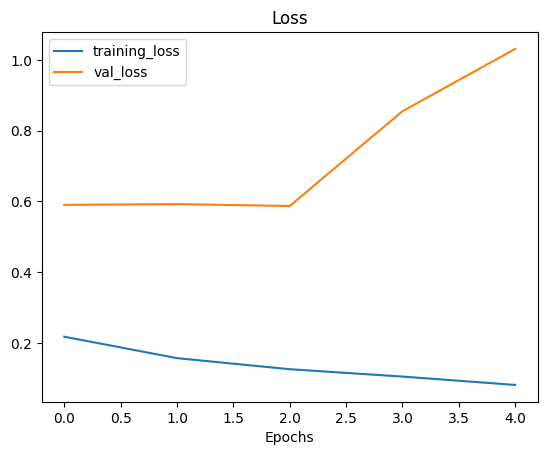

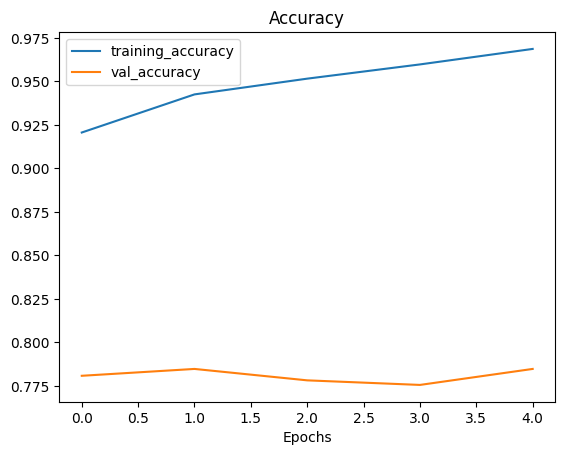

In [47]:
plot_loss_curves(model_2_history)

In [48]:
model_2_preds=tf.squeeze(tf.round(model_1_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [49]:
model_2_results=calculation_results(val_label,model_2_preds)
model_2_results

{'accuracy': 78.60892388451444,
 'precision': 0.7907394181632303,
 'recall': 0.7860892388451444,
 'f1': 0.7831536805930754}

In [50]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [51]:
 # build gru model
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorization(inputs)
x=embedding(x)

x=layers.GRU(64)(x)
outputs=layers.Dense(1,activation='sigmoid')(x)
model_3_gru=tf.keras.Model(inputs,outputs,name='model_3_gru')


In [52]:
model_3_gru.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_____________________________________________

In [53]:
model_3_gru.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3_history=model_3_gru.fit(train_sentence,
                            train_label,
                            epochs=5,
                            validation_data=(val_sentence,val_label),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'model_3_gru')])

Saving TensorBoard log files to: model_logs/model_3_gru/20240801-131657
Epoch 1/5
215/215 [==============================] - 4s 10ms/step - loss: 0.1576 - accuracy: 0.9345 - val_loss: 0.7419 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0838 - accuracy: 0.9696 - val_loss: 0.7126 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0707 - accuracy: 0.9724 - val_loss: 0.9745 - val_accuracy: 0.7782
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0588 - accuracy: 0.9739 - val_loss: 1.2523 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.0524 - accuracy: 0.9780 - val_loss: 1.3423 - val_accuracy: 0.7677


In [54]:
model_3_pred_probs=model_3_gru.predict(val_sentence)
model_3_pred_probs

24/24 [==============================] - 0s 4ms/step


array([[1.64060257e-04],
       [9.17874157e-01],
       [9.99890208e-01],
       [7.69150071e-03],
       [6.21139043e-05],
       [9.99589145e-01],
       [9.86558795e-01],
       [9.99948382e-01],
       [9.99918938e-01],
       [9.56059992e-01],
       [2.10851067e-04],
       [9.57680285e-01],
       [1.29082415e-04],
       [3.03471953e-01],
       [8.64237081e-05],
       [2.84136797e-04],
       [2.76764942e-04],
       [1.17908858e-04],
       [9.50613117e-04],
       [9.99794424e-01],
       [9.93893325e-01],
       [2.46137024e-05],
       [9.99770224e-01],
       [2.54975545e-04],
       [9.99923944e-01],
       [9.99948740e-01],
       [2.18885994e-04],
       [1.36014540e-04],
       [1.22936777e-04],
       [2.48742729e-01],
       [9.93942320e-01],
       [1.21950419e-04],
       [4.20064805e-03],
       [8.03409261e-04],
       [6.23855948e-01],
       [8.30639377e-02],
       [9.99875307e-01],
       [6.59563020e-02],
       [2.71758833e-03],
       [9.99949098e-01],


In [55]:
model_3_preds=tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [56]:
model_3_results=calculation_results(val_label,model_3_preds)
model_3_results

{'accuracy': 76.77165354330708,
 'precision': 0.7686883789989795,
 'recall': 0.7677165354330708,
 'f1': 0.7659262393850468}

In [57]:
# build a bidirectional rnn
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorization(inputs)
x=embedding(x)

# layers.Bidirectional(layers.LSTM(64,return_sequences=True))(x)

x=layers.Bidirectional(layers.LSTM(64))(x)

outputs=layers.Dense(1,activation='sigmoid')(x)
model_4=tf.keras.Model(inputs,outputs)

In [58]:
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-train

In [59]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_4_history=model_4.fit(train_sentence,
                            train_label,
                            epochs=5,
                            validation_data=(val_sentence,val_label),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'model_4_bidirectional')])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20240801-131709
Epoch 1/5
215/215 [==============================] - 5s 14ms/step - loss: 0.1103 - accuracy: 0.9675 - val_loss: 1.0147 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0535 - accuracy: 0.9766 - val_loss: 1.1899 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0483 - accuracy: 0.9778 - val_loss: 1.1243 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0425 - accuracy: 0.9806 - val_loss: 1.3132 - val_accuracy: 0.7756
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0415 - accuracy: 0.9807 - val_loss: 1.2884 - val_accuracy: 0.7730


In [60]:
model_4_pred_probs=model_4.predict(val_sentence)
model_4_pred_probs

24/24 [==============================] - 1s 5ms/step


array([[6.04016557e-02],
       [7.39562273e-01],
       [9.99952078e-01],
       [2.18652666e-01],
       [1.05357001e-04],
       [9.99776542e-01],
       [9.81559098e-01],
       [9.99977589e-01],
       [9.99960423e-01],
       [9.98698592e-01],
       [3.08453309e-04],
       [7.35397398e-01],
       [2.42242080e-04],
       [1.81575805e-01],
       [1.57205999e-04],
       [6.81619952e-03],
       [4.06030100e-04],
       [1.98008187e-04],
       [2.52474040e-01],
       [9.99826133e-01],
       [9.80533600e-01],
       [1.01065161e-04],
       [9.99831557e-01],
       [2.10823468e-03],
       [9.99886036e-01],
       [9.99977589e-01],
       [7.08083156e-04],
       [2.03053770e-03],
       [4.49796906e-04],
       [8.09541345e-01],
       [9.98980820e-01],
       [1.85931334e-03],
       [9.77996830e-03],
       [8.32711987e-04],
       [9.59621727e-01],
       [2.18677685e-01],
       [9.99924302e-01],
       [3.21444124e-01],
       [3.03731835e-03],
       [9.99924421e-01],


In [61]:
model_4_preds=tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [62]:
model_4_results=calculation_results(val_label,model_4_preds)
model_4_results

{'accuracy': 77.29658792650919,
 'precision': 0.7730528656214299,
 'recall': 0.7729658792650919,
 'f1': 0.7718716556605149}

# build cnn of text

In [63]:
embedding_test=embedding(text_vectorization(['This is a test sentence']))
conv_1d=layers.Conv1D(filters=32,
                      kernel_size=5,
                      activation='relu',
                      padding='valid')

conv_1d_output=conv_1d(embedding_test)
max_pool=layers.GlobalMaxPool1D()
max_pool_output=max_pool(conv_1d_output)

embedding_test.shape,conv_1d_output.shape,max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [64]:
# embedding_test

In [65]:
# conv_1d_output

In [66]:
# max_pool_output

In [67]:
inputs=layers.Input(shape=(1,),dtype='string')
x=text_vectorization(inputs)
x=embedding(x)

x=layers.Conv1D(filters=64,kernel_size=5,strides=1,activation='relu',padding='valid')(x)
x=layers.GlobalMaxPool1D()(x)
outputs=layers.Dense(1,activation='sigmoid')(x)

model_5=tf.keras.Model(inputs,outputs,name='model_5_conv1d')

# compile conv1d
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_5.summary()

Model: "model_5_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 1)              

In [68]:
model_5_history=model_5.fit(train_sentence,
                            train_label,
                            epochs=5,
                            validation_data=(val_sentence,val_label),
                            callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                   'model_5_conv1d')])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20240801-131726
Epoch 1/5
215/215 [==============================] - 3s 7ms/step - loss: 0.1263 - accuracy: 0.9600 - val_loss: 0.9388 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0760 - accuracy: 0.9729 - val_loss: 1.0356 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0629 - accuracy: 0.9761 - val_loss: 1.1420 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0575 - accuracy: 0.9772 - val_loss: 1.1564 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0531 - accuracy: 0.9771 - val_loss: 1.2179 - val_accuracy: 0.7598


In [69]:
model_5_pred_probs=model_5.predict(val_sentence)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[2.1228027e-01],
       [8.4210348e-01],
       [9.9985886e-01],
       [5.0004717e-02],
       [4.2071946e-07],
       [9.8975533e-01],
       [9.8315811e-01],
       [9.9998105e-01],
       [9.9999845e-01],
       [8.4438962e-01]], dtype=float32)

In [70]:
model_5_preds=tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [71]:
model_5_result=calculation_results(val_label,model_5_preds)
model_5_result

{'accuracy': 75.98425196850394,
 'precision': 0.7604578907479682,
 'recall': 0.7598425196850394,
 'f1': 0.758116023760764}

# using tensorflow_hub for transfer learning in NLP

In [72]:
sample_sentences

"There's a flood in my street"

In [73]:
gpus = tf.config.list_physical_devices("CPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


In [74]:
import tensorflow_hub as hub
#embed = hub.load("/kaggle/input/universal-sentence-encoder/tensorflow2/universal-sentence-encoder/2")
#embed = hub.load("https://kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow1/variations/universal-sentence-encoder/versions/1")
embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")

embed_samples=embed([sample_sentences,
                     'when you can the universal sentence encoder on a sentence, it turns it into numbers.'])
print(embed_samples[0][:50])

UnknownError: Graph execution error:

JIT compilation failed.
	 [[{{node EncoderDNN/EmbeddingLookup/EmbeddingLookupUnique/embedding_lookup/mod}}]] [Op:__inference_restored_function_body_52077]

In [78]:
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Identity: Dst tensor is not initialized. [Op:Identity]